<a href="https://colab.research.google.com/github/Akshithaa25/Machine_Learning_502/blob/main/2348502_ML_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

In [2]:
from google.colab import files
uploaded = files.upload()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation.csv


In [3]:
data = pd.read_csv('Market_Basket_Optimisation.csv')
data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7500, 20)

In [5]:
data = data.fillna(0)
data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shrimp               0
almonds              0
avocado              0
vegetables mix       0
green grapes         0
whole weat flour     0
yams                 0
cottage cheese       0
energy drink         0
tomato juice         0
low fat yogurt       0
green tea            0
honey                0
salad                0
mineral water        0
salmon               0
antioxydant juice    0
frozen smoothie      0
spinach              0
olive oil            0
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Number of Missing Values')

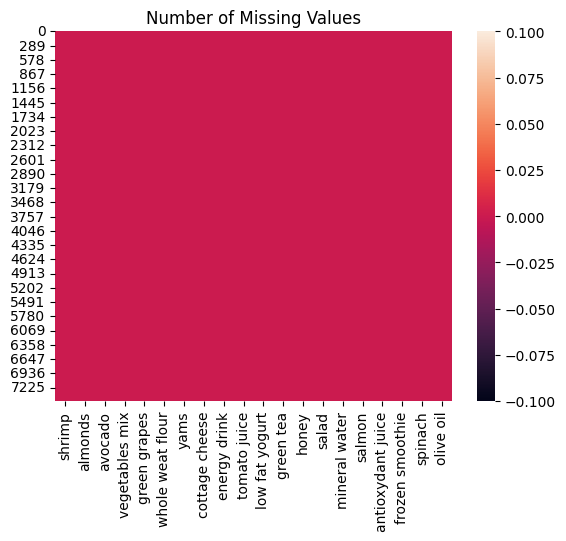

In [11]:
data.isnull().sum()
sns.heatmap(data.isnull())
plt.title("Number of Missing Values")

In [13]:
data = pd.get_dummies(data, columns = ['shrimp','almonds','avocado','vegetables mix','green grapes','whole weat flour',
                                   'yams','cottage cheese','energy drink','tomato juice','low fat yogurt','green tea','honey','salad','mineral water','salmon',
                                   'antioxydant juice','frozen smoothie','spinach','olive oil'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp_almonds,shrimp_antioxydant juice,shrimp_asparagus,shrimp_avocado,shrimp_babies food,shrimp_bacon,shrimp_barbecue sauce,shrimp_black tea,shrimp_blueberries,shrimp_body spray,...,antioxydant juice_0,antioxydant juice_french fries,antioxydant juice_frozen smoothie,frozen smoothie_0,frozen smoothie_protein bar,frozen smoothie_spinach,spinach_0,spinach_cereals,spinach_mayonnaise,olive oil_0.0
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [16]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp_almonds,shrimp_antioxydant juice,shrimp_asparagus,shrimp_avocado,shrimp_babies food,shrimp_bacon,shrimp_barbecue sauce,shrimp_black tea,shrimp_blueberries,shrimp_body spray,...,antioxydant juice_0,antioxydant juice_french fries,antioxydant juice_frozen smoothie,frozen smoothie_0,frozen smoothie_protein bar,frozen smoothie_spinach,spinach_0,spinach_cereals,spinach_mayonnaise,olive oil_0.0
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,0.001467,0.002400,0.000400,0.007600,0.000667,0.000800,0.000400,0.001200,0.000533,0.000133,...,0.999600,0.000133,0.000267,0.999600,0.000267,0.000133,0.999733,0.000133,0.000133,1.0
std,0.038272,0.048934,0.019997,0.086852,0.025813,0.028275,0.019997,0.034623,0.023089,0.011547,...,0.019997,0.011547,0.016329,0.019997,0.016329,0.011547,0.016329,0.011547,0.011547,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


To find the popularity

In [18]:
product_popularity = data.sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
sorted_product_popularity = product_popularity.sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


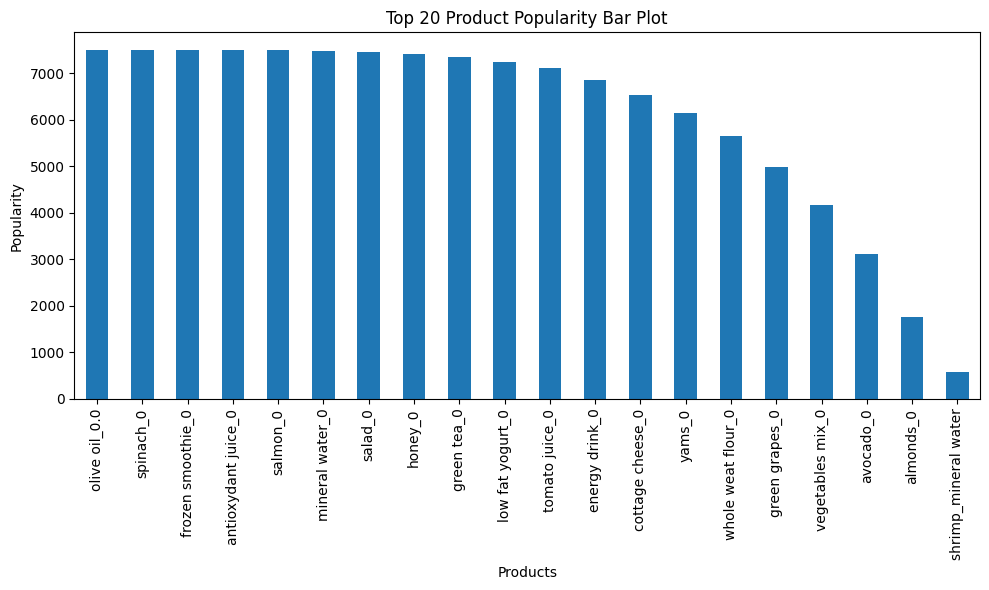

In [21]:
top_n = 20
top_n_products = sorted_product_popularity[:top_n]

plt.figure(figsize=(10, 6))


top_n_products.plot(kind='bar')

plt.xlabel('Products')
plt.ylabel('Popularity')
plt.title(f'Top {top_n} Product Popularity Bar Plot')


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()